In [1]:
from bs4 import BeautifulSoup
import requests
import re
import json
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
prospect_to_docs = {}
prospect_to_position = {}

#page of the top 100 prospects
profile_urls = set()
url = "http://www.draftexpress.com/rankings/Top-100-Prospects/#list"
    
r = requests.get(url)
data = r.text
    
soup = BeautifulSoup(data, "html.parser")
    
profile_urls = {tag["href"] for tag in soup.find_all(name="a", href=re.compile(r"\/profile\/.+")) 
                if "/stats" not in tag["href"] and "/videos" not in tag["href"]}

for profile_url in profile_urls:
    player_name = re.findall(r"\/profile\/([^\/]+)", profile_url)[0]
    player_name = " ".join(re.split(r"-", player_name)[:-1])
    print(player_name)

    full_profile_url = "http://www.draftexpress.com" + str(profile_url)
    profile_r = requests.get(full_profile_url)
    profile_data = profile_r.text

    profile_soup = BeautifulSoup(profile_data, "html.parser")
    
    m = re.search('Position:\s(\S+)', profile_soup.get_text())
    prospect_to_position[player_name] = m.group(1)
#     for div in profile_soup.find_all(class_="data small-12 medium-6 column"):
#         m = re.search('Position:\s(\S+)', div.get_text())
#         if m:
#             prospect_to_position[player_name] = m.group(1)
#             break

    text = ""
    for a in profile_soup.find_all(class_="article-content"):    
        cleaned = re.sub(r'<.+>', '', a.get_text())
        cleaned = re.sub(r'<div>.+<\/div>', '', cleaned)
        cleaned = re.sub(r"\([\S\s]+\)", "", cleaned)
        cleaned = cleaned.replace("-", " ")
        cleaned = cleaned.replace("#", "")
        cleaned = cleaned.replace("%", "")
        cleaned = cleaned.replace("Please enable Javascript to watch this video", "")
        text += cleaned
        #if a.parent.name == "div" and "item" in p.parent["class"]:
        #    text.append(a.get_text())

    prospect_to_docs[player_name] = text.encode("utf-8")

with open("prospect_to_docs.json", "w") as f:
    json.dump(prospect_to_docs, f)
    
with open("prospect_to_position.json", "w") as f:
    json.dump(prospect_to_position, f)

Jawun Evans
Tacko Fall
Malcolm Hill
Johnathan Motley
Viny Okouo
Zach Collins
Ivan Rabb
John Collins
P.J. Dozier
Jayson Tatum
Caleb Swanigan
Bam Adebayo
Markelle Fultz
Drew Eubanks
Frank Ntilikina
Jonathan Jeanne
Justin Patton
Mathias Lessort
Lauri Markkanen
Devin Robinson
Isaiah Hartenstein
Kostja Mushidi
Santiago Yusta
Luke Kennard
Antonius Cleveland
Dedric Lawson
Sindarius Thornwell
Alpha Kaba
Kyle Kuzma
Frank Jackson
Laurynas Birutis
Melo Trimble
Borisa Simanic
Rodions Kurucs
Mikal Bridges
Rolands Smits
Dwayne Bacon
Rawle Alkins
Grayson Allen
Marques Bolden
Luke Kornet
Shake Milton
Dennis Smith
Nigel Williams Goss
Malik Monk
Arnoldas Kulboka
Dillion Brooks
Derrick White
Tony Bradley
Semi Ojeleye
Cameron Oliver
Aleksandar Vezenkov
Tadas Sedekerskis
Anzejs Pasecniks
George De Paula
Jordan Bell
Chimezie Metu
Josh Hart
Jaron Blossomgame
Frank Mason
Devonte Graham
Andrew White
Nik Slavica
Isaiah Briscoe
D.J. Wilson
Thomas Bryant
Josh Jackson
T.J. Leaf
Omer Yurtseven
Andrew Jones
Felipe D

[(u'nba', 657), (u'draft', 382), (u'ball', 361), (u'video', 306), (u'top', 304), (u'big', 285), (u'per', 275), (u'one', 265), (u'game', 263), (u'prospects', 260), (u'year', 257), (u'shooting', 251), (u'point', 248), (u'interview', 235), (u'long', 231), (u'high', 219), (u'make', 215), (u'good', 209), (u'shot', 208), (u'team', 202), (u'get', 200), (u'around', 194), (u'ability', 194), (u'season', 193), (u'strong', 192), (u'level', 189), (u'guard', 181), (u'still', 178), (u'last', 176), (u'play', 171), (u'offensive', 170), (u'great', 163), (u'minutes', 162), (u'size', 161), (u"doesn't", 161), (u'40', 159), (u'also', 158), (u'rim', 158), (u'much', 157), (u'player', 155), (u'frame', 153), (u'3', 150), (u'first', 149), (u'shots', 149), (u'defensive', 148), (u'forward', 148), (u'two', 146), (u'impressive', 143), (u'physical', 142), (u'time', 140)]
1070.06


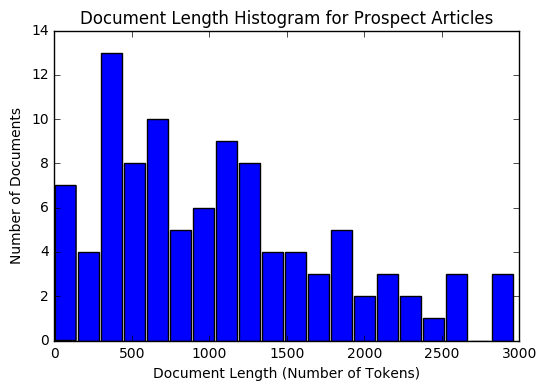

In [3]:
sw = set(stopwords.words('english'))
sw.add("he's")

prospect_words = {}
prospect_lengths = []
with open("prospect_to_docs.json") as f:
    for line in f:
        json_line = json.loads(line)
        all_texts = json_line.values()
        for text in all_texts:
            text = text.replace("Please enable Javascript to watch this video", "")
            tokens = text.split()
            prospect_lengths.append(len(tokens))
            for token in tokens:
                token = token.lower()
                if token not in sw:
                    if token in prospect_words:
                        prospect_words[token] += 1
                    else:
                        prospect_words[token] = 1
print sorted(prospect_words.items(), key= lambda x:x[1], reverse=True)[:50]

print np.mean(prospect_lengths)
plt.hist(prospect_lengths, bins=20, rwidth=0.9)
plt.title("Document Length Histogram for Prospect Articles")
plt.xlabel("Document Length (Number of Tokens)")
plt.ylabel("Number of Documents")
plt.show()

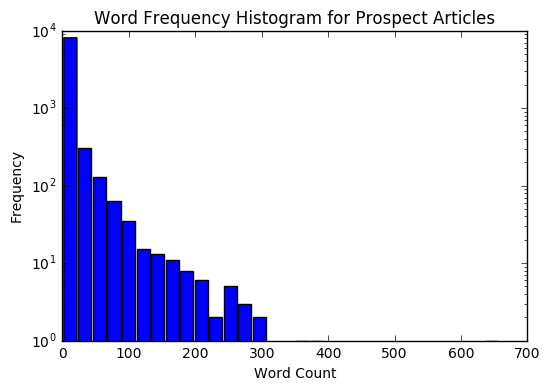

In [4]:
plt.hist(prospect_words.values(), bins=30, rwidth=0.9, log=True)
plt.title("Word Frequency Histogram for Prospect Articles")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [5]:
player_words = {}
player_lengths = []
with open("curr_player_to_docs.json") as f:
    for line in f:
        json_line = json.loads(line)     
        
        all_texts = json_line.values()

        for text in all_texts:
            text = text.replace("Please enable Javascript to watch this video", "")
            tokens = text.split()
            player_lengths.append(len(tokens))
            for token in tokens:
                token = token.lower()
                if token not in sw:
                    if token in player_words:
                        player_words[token] += 1
                    else:
                        player_words[token] = 1
print sorted(player_words.items(), key= lambda x:x[1], reverse=True)[:50]

print np.mean(player_lengths)
print len(player_lengths)
plt.hist(player_lengths, bins=20, rwidth=0.9)
plt.title("Document Length Histogram for Player Articles")
plt.xlabel("Document Length (Number of Tokens)")
plt.ylabel("Number of Documents")
plt.show()

IOError: [Errno 2] No such file or directory: 'curr_player_to_docs.json'

In [ ]:
plt.hist(player_words.values(), bins=30, rwidth=0.9, log=True)
plt.title("Word Frequency Histogram for Player Articles")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()